Lab 6 - Trinh Pham and Joesph Delgadillo

In [1]:
import pandas as pd

file_path = "NYC_taxi_fares.csv"
df = pd.read_csv(file_path)

df.head()  #printing dataset


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


Data Cleaning

Process where we will be removing columns with 0's or NULL values. This will make our data much more clean and easier to compute

In [2]:
df = df[(df != 0).all(1)]
df = df.dropna()

df = df.reset_index(drop=True)

Euclidean Distance formula ((latitude1-latitude2)^2 + (longitude1-longitude2)^2)^0.5)

Computing distance for each taxi ride


In [3]:
def euc_distance(lat1, long1, lat2, long2):
    return ((lat1 - lat2) ** 2 + (long1 - long2) ** 2) ** 0.5

# Apply the euc_distance function to calculate the distance for each row
df['distance'] = euc_distance(df['pickup_latitude'], df['pickup_longitude'], df['dropoff_latitude'], df['dropoff_longitude'])

#this will create a seperate column in the dataset to store the distances of each ride
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,distance
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,0.009436
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,0.079696
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,0.013674
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,0.025340
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,0.019470


Parsing the pieces of data because taxi fares surcharge depending on time of pickup and date, so it is crucial that the machine knows the date/time. Parsing allows for better machine comprehension

In [4]:
# Convert 'pickup_datetime' to datetime data type
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

# Create new columns and assign the extracted values
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['day_of_week'] = df['pickup_datetime'].dt.dayofweek
df['hour'] = df['pickup_datetime'].dt.hour


Since we have computed the euclidean distance, longitude and latitude are of no use to the dataset anymore.
We are going to delete the key, pickup_datetime, longitude and latitude columns

In [5]:
columns_removal = ['key', 'pickup_datetime', 'pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']
df = df.drop(columns_removal, axis=1)
df.head()

,fare_amount,passenger_count,distance,year,month,day,day_of_week,hour
0,4.5,1,0.009436,2009,6,15,0,17
1,16.9,1,0.079696,2010,1,5,1,16
2,5.7,2,0.013674,2011,8,18,3,0
3,7.7,1,0.025340,2012,4,21,5,4
4,5.3,1,0.019470,2010,3,9,1,7


Data preprocessing
Normal Standardization

Normal standardization (feature scaling) transforms data to have a mean of 0 and standard deviation of 1

In [6]:
from sklearn.preprocessing import StandardScaler

#columns to be standardized
columns_to_standardize = ['fare_amount','passenger_count', "distance", 'year', 'month', 'day', 'day_of_week', 'hour']
X_to_scale = df[columns_to_standardize]

scaler = StandardScaler()
scaler.fit(X_to_scale)

#transforms selected columns
X_scaled = scaler.transform(X_to_scale)

#replaces original columns with scaled data
df[columns_to_standardize] = X_scaled
  

df.head()

,fare_amount,passenger_count,distance,year,month,day,day_of_week,hour
0,-0.701060,-0.529102,-0.007416,-1.469068,-0.078282,-0.080307,-1.559067,0.536139
1,0.569952,-0.529102,-0.000516,-0.933028,-1.533250,-1.232332,-1.046137,0.382582
2,-0.578059,0.236334,-0.006999,-0.396988,0.503705,0.265300,-0.020276,-2.074325
3,-0.373057,-0.529102,-0.005854,0.139053,-0.660269,0.610908,1.005585,-1.460098
4,-0.619060,-0.529102,-0.006430,-0.933028,-0.951263,-0.771522,-1.046137,-0.999428


Data splitting for training and testing (20% for testing and 80% for training) 

In [7]:
from sklearn.model_selection import train_test_split

#The feature matrix and target variable will be the fare_amount column
X = df.drop("fare_amount", axis=1) 
y = df["fare_amount"]

# Splitting the data into training and testing sets 
#We will take 20% of the data for testing and reserve the other 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1024302 entries, 0 to 1024301
Data columns (total 8 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   fare_amount      1024302 non-null  float64
 1   passenger_count  1024302 non-null  float64
 2   distance         1024302 non-null  float64
 3   year             1024302 non-null  float64
 4   month            1024302 non-null  float64
 5   day              1024302 non-null  float64
 6   day_of_week      1024302 non-null  float64
 7   hour             1024302 non-null  float64
dtypes: float64(8)
memory usage: 62.5 MB


Creating Neural Network Model

Feedforward neural network with three layers:

In [8]:
import tensorflow as tf
from tensorflow import keras


#The input shape will be 7 since the output column was dropped 
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(7,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
  # Output layer for mean squared error
])

Data testing, low MSE = better model performance

In [17]:
#We will be using mean squared error, the lower the MSE the better the model performance
#decided to use 25 epochs because 100 took too long to render
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy}')
predictions = model.predict(X_new_data)

Epoch 1/25


/usr/local/lib/python3.9/dist-packages/keras/engine/data_adapter.py:1508: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


20486/20486 [==============================] - 54s 3ms/step - loss: 0.2204 - mean_squared_error: 0.2204 - val_loss: 0.2376 - val_mean_squared_error: 0.2376
Epoch 2/25
20486/20486 [==============================] - 52s 3ms/step - loss: 0.2195 - mean_squared_error: 0.2195 - val_loss: 0.2365 - val_mean_squared_error: 0.2365
Epoch 3/25
20486/20486 [==============================] - 53s 3ms/step - loss: 0.2197 - mean_squared_error: 0.2197 - val_loss: 0.2355 - val_mean_squared_error: 0.2355
Epoch 4/25
20486/20486 [==============================] - 55s 3ms/step - loss: 0.2193 - mean_squared_error: 0.2193 - val_loss: 0.2359 - val_mean_squared_error: 0.2359
Epoch 5/25
20486/20486 [==============================] - 54s 3ms/step - loss: 0.2196 - mean_squared_error: 0.2196 - val_loss: 0.2374 - val_mean_squared_error: 0.2374
Epoch 6/25
20486/20486 [==============================] - 53s 3ms/step - loss: 0.2198 - mean_squared_error: 0.2198 - val_loss: 0.2346 - val_mean_squared_error: 0.2346
Epoch 7/2

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



20486/20486 [==============================] - 53s 3ms/step - loss: 0.2196 - mean_squared_error: 0.2196 - val_loss: 0.2373 - val_mean_squared_error: 0.2373
Epoch 20/25
20486/20486 [==============================] - 53s 3ms/step - loss: 0.2201 - mean_squared_error: 0.2201 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 21/25
20486/20486 [==============================] - 53s 3ms/step - loss: 0.2192 - mean_squared_error: 0.2192 - val_loss: 0.2377 - val_mean_squared_error: 0.2377
Epoch 22/25
20486/20486 [==============================] - 53s 3ms/step - loss: 0.2189 - mean_squared_error: 0.2189 - val_loss: 0.2357 - val_mean_squared_error: 0.2357
Epoch 23/25
20486/20486 [==============================] - 51s 2ms/step - loss: 0.2185 - mean_squared_error: 0.2185 - val_loss: 0.2361 - val_mean_squared_error: 0.2361
Epoch 24/25
20486/20486 [==============================] - 54s 3ms/step - loss: 0.2198 - mean_squared_error: 0.2198 - val_loss: 0.2391 - val_mean_squared_error: 0.2391
Epoc

NameError: name 'X_new_data' is not defined

In [18]:
#history object is a dictionary containing data
#Retrieves training history
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])

Plotting the training data.
The plots allows for a visual representation of of loss and accuracy.
It is to monitor the model progress.

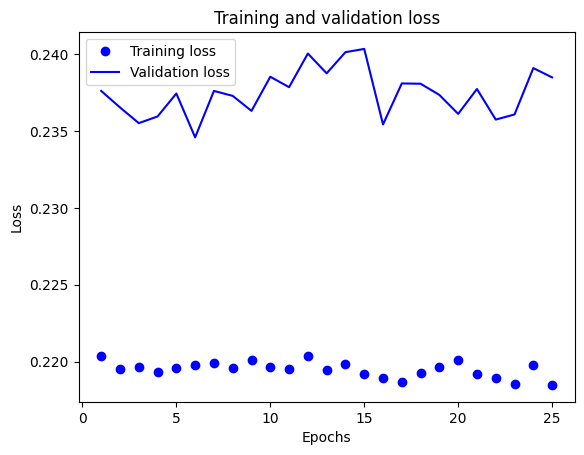

In [19]:
import matplotlib.pyplot as plt

# Plot the training and validation loss
loss_values = history_dict["loss"]    #Gets loss values from training
val_loss_values = history_dict["val_loss"]   
epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

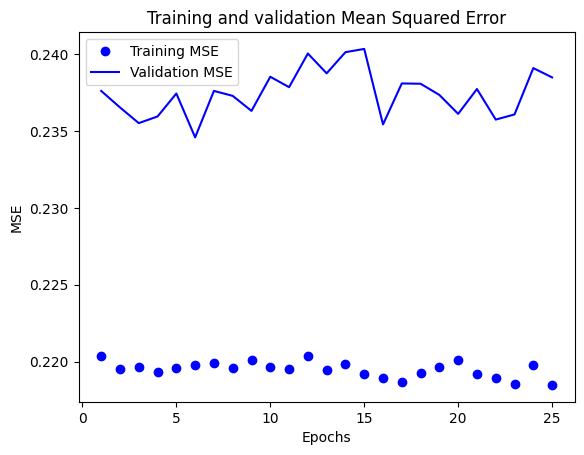

In [20]:
# Plot the training and validation accuracy
plt.clf()
acc = history_dict["mean_squared_error"]  # Get the mean squared error values from training
val_acc = history_dict["val_mean_squared_error"]  # Get the validation mean squared error values
epochs = range(1, len(acc) + 1)

#
plt.plot(epochs, acc, "bo", label="Training MSE")  #plots training MSE values
plt.plot(epochs, val_acc, "b", label="Validation MSE") #Plots validation MSE values
plt.title("Training and validation Mean Squared Error")
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [21]:
predictions = model.predict(X_test)

# Evaluate the model on the testing dataset (same evaluation as before)
test_loss, test_mse = model.evaluate(X_test, y_test)
print(f'Test Mean Squared Error: {test_mse}')

# Inspect the predictions
print(predictions)

6402/6402 [==============================] - 13s 2ms/step - loss: 0.2274 - mean_squared_error: 0.2274
Test Mean Squared Error: 0.22738564014434814
[[-0.26488838]
 [-0.01903838]
 [-0.411944  ]
 ...
 [-0.35063753]
 [-0.6353774 ]
 [-0.435388  ]]
